# Installation 

from the root kmcluster folder you want to run the 'pip install -e .' then you will be able to run the box below without errors

In [1]:
import numpy as np 
from kmcluster.core.kmc import kmc
from kmcluster.core.transition_conditions import rfkmc, rkmc
from kmcluster.core.intialize import random_init, boltz, global_minimum_only, selected
from kmcluster.core.data import pull_json

# Parameters 

you can either create a dictionary manually or import a json using "pull_json" 

In [11]:
time_end = 100 # time stop condition
steps = 100 # number of steps
size = 100 # number of independet trajectories 
n_states = 10 # number of states
energies = [0, 1.0, 1.0, -1.0] # list of energies 
init_dict = {0:0.5, 1:0.5} # dictionary of custom proportions to start with ({state:proportion,...})
temp_boltz = 1.0  # temperature for boltzmann distribution + kmc
temp_sample = 1.0 # temp for sampling kmc
rates_two_states = [[0.0,0.1],[0.01, 0.0]]
rates_four_states_sink = np.array([[0.0,0.0,0.0,0.1],[0.0,0.0,0.0,0.1],[0.0,0.0,0.0,0.1],[0.0,0.0,0.0,0.0]])
rates_four_sym = np.array(
    [[0.0,1.1,0.0,0.0],
    [0.0,0.0,1.1,0.0],
    [0.0,0.0,0.0,1.1],
    [1.1,0.0,0.0,0.0]])
rates_as_sparse = []

parameters = {
    'time': time_end,
    'steps': steps,
    'size': size,
    'n_states': n_states,
    'energies': energies,
    'rates': rates_four_sym.tolist(),
    'draw_method': 'rfkmc',
    'init_method': 'random_init',
    #'draw_obj': rfkmc(rates_four_sym),
    #'init_obj': random_init(size, 4),
    't_boltz': 10, 
    'init_state_proportion': {0:0.5, 1:0.5}
}


# save parameters as json
#import json 
#json.dump(parameters, open('parameters.json', 'w'), indent=4)

# load parameters from json
parameters = pull_json('./parameters.json')

# Initializations

1) boltz - given temp, number of trajectories, and energies initialize
2) global min - give it a list of energies
3) selected - user specified in the format {index of start:proportion, ...}
4) random

In [12]:
# different initalization options 
init_boltz = boltz(energies = energies, T=temp_boltz, size = size)
init_global_min = global_minimum_only(energies=energies, size=size)
init_select = selected(size, init_dict, n_states)
init_random = random_init(size, n_states)

# Drawing Criteria: 
Two options are available right now: 
1) rfkmc - rejection free kmc 
2) rkmc - rejection kmc where you input parameter r_0

In [13]:
rfkmc_obj=rfkmc()
rkmc = rkmc(r_0 = 1.0)

TypeError: 'rkmc' object is not callable

# Putting it together in kmc()
You can now construct the kmc object and .run() will run the trajectories. Note that steps != time so you can either set steps or time_stop where time will stop once all trajectories reach a certain time or steps are reached, whichever comes first.

In [14]:
rfkmc_obj=rfkmc()

init_boltz = boltz(
    energies = energies, 
    T=temp_boltz, 
    size=10000)

# initialize kmc object
kmc_boltz = kmc(
    steps=1000,
    time_stop = 1000, 
    pop_size=parameters['size'],
    rates=rates_four_sym,
    draw_crit=rfkmc_obj,
    initialization=init_boltz,
)

# run calcs
kmc_boltz.run(n_steps=10)

100%|██████████| 10/10 [00:00<00:00, 17.23it/s]


In [15]:
# extract trajectories after run
trajectories = kmc_boltz.trajectories

# Visualizations 

In [16]:
from kmcluster.core.viz import (
    plot_top_n_states, 
    graph_trajectories_static, 
    graph_trajectories_dynamic, 
    communities_static, 
    compute_state_counts
)

In [17]:
#compute_state_counts(trajectories, resolution=0.1, n_states=4)

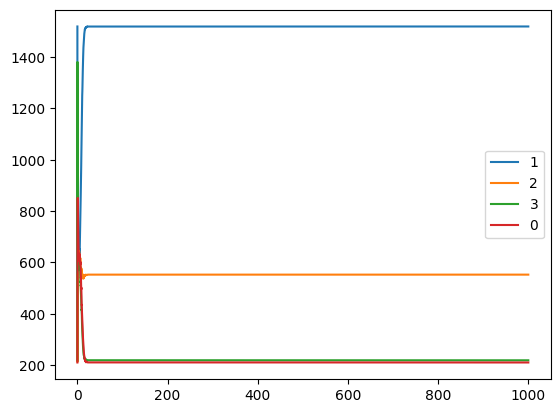

In [18]:
# trajectories object
# n_show = number of states to show
# total_states = total state number of states in the system 
# max_time = upper bound of plotting 

plot_top_n_states(
    trajectories, 
    n_show=4, 
    total_states = 4, 
    resolution = 1,
    max_time = 1000)

In [10]:
time_slice = 0
graph_trajectories_static(trajectories, time_slice) # TODO: heatmap graph of a given timeframe, -1 is for the last step each traj reached

In [ ]:
#graph_trajectories_dynamic(trajectories, max_time = 1000) # TODO: movie of heatmap over time

In [ ]:
#communities_static(trajectories, time = 1000) # TODO: create superbasins of states using community graph algorithms

In [ ]:
#communities(trajectories, max_time = 1000) # TODO: create superbasins of states using community graph algorithms